# CLASS: CSE7345
# NAME: Hanspal, Randeep
# SMUID: 47812509
# QUEST4 DataFrame Pandas 
### Below are the 10 examples after exploring Pandas documentation:

In [1]:
import pandas as pd
import numpy as np

# 1. Use of divmod() 
### Below examples contains Series and Index support divmod() builtin.
### This function takes the floor division and modulo operation at the same time returning a two-tuple of the same type

In [2]:
s = pd.Series(np.arange(10))
print(s)
print type(s)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
<class 'pandas.core.series.Series'>


In [3]:
#use of divmod()
div, rem = divmod(s, 3)

In [4]:
#lets print the modulus value
#div stores the division value
#rem stores the modulus value
print (rem)

0    0
1    1
2    2
3    0
4    1
5    2
6    0
7    1
8    2
9    0
dtype: int64


In [5]:
#We can also use Index to support divmod()
idx = pd.Index(np.arange(10))
idx

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [6]:
#div stores the division value
#rem stores the modulus value
div, rem = divmod(idx, 3)
print (div)
print (rem)

Int64Index([0, 0, 0, 1, 1, 1, 2, 2, 2, 3], dtype='int64')
Int64Index([0, 1, 2, 0, 1, 2, 0, 1, 2, 0], dtype='int64')


In [7]:
#We can also do elementwise divmod():
div, rem = divmod(s, [2, 2, 3, 3, 4, 4, 5, 5, 6, 6])
print (div)

0    0
1    0
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int64


# 2. Category: Renaming / mapping labels
### The rename() method allows you to relabel an axis based on some mapping (a dict or Series)

In [8]:
#Creating a Dataframe with column and row index name
df = pd.DataFrame({'one' : pd.Series(np.random.randn(4), index=['a', 'b', 'c','d']),
                   'two' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
                    'three' : pd.Series(np.random.randn(4), index=['a','b', 'c', 'd'])})
(df)

,one,three,two
a,0.205400,1.443436,-0.149828
b,-0.523175,0.776837,0.692917
c,-0.597164,-1.103013,-0.004224
d,-1.185695,-0.445528,-1.569498


In [9]:
#uppercase the row index name
df.rename(str.upper)

,one,three,two
A,0.205400,1.443436,-0.149828
B,-0.523175,0.776837,0.692917
C,-0.597164,-1.103013,-0.004224
D,-1.185695,-0.445528,-1.569498


In [10]:
#rename the 2 columns and the 3 rows values
df.rename(columns={'one': 'foo', 'two': 'bar'},
index={'a': 'apple', 'b': 'banana', 'd': 'durian'})

,foo,three,bar
apple,0.205400,1.443436,-0.149828
banana,-0.523175,0.776837,0.692917
c,-0.597164,-1.103013,-0.004224
durian,-1.185695,-0.445528,-1.569498


# 3. Category: Styling
### Highlight maximum value


In [11]:
#function used to highlight max value
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

#Lets print the maximum value in yellow
df.style.apply(highlight_max)

# 4. Category: Styling
### Highlight negative value

In [12]:
#function used to color negative numbers red and positive numbers black.
def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

#lets print the negative value in red
s = df.style.applymap(color_negative_red)
s

# 5. Category: Styling
### Highlight maximum in a series or DataFrame

In [13]:
#function used to highlight the maximum in a series
def highlight_max(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)
    
#Lets print one maximum in a series
df.style.apply(highlight_max, color='darkorange', axis=None)

# 6. astype

### This method explicitly convert dtypes from one to another. 
### These will by default return a copy, even if the dtype was unchanged (pass copy=False to change this behavior)


In [14]:
print (df)

#print type of df
df.dtypes

        one     three       two
a  0.205400  1.443436 -0.149828
b -0.523175  0.776837  0.692917
c -0.597164 -1.103013 -0.004224
d -1.185695 -0.445528 -1.569498


one      float64
three    float64
two      float64
dtype: object

In [15]:
# conversion of dtypes
print (df.astype('float32').dtypes)

one      float32
three    float32
two      float32
dtype: object


In [16]:
#Lets print our df
print (df)
#Convert certain columns to a specific dtype
dft1 = df.astype({'one': np.int64,'three': np.int64})
dft1

        one     three       two
a  0.205400  1.443436 -0.149828
b -0.523175  0.776837  0.692917
c -0.597164 -1.103013 -0.004224
d -1.185695 -0.445528 -1.569498


,one,three,two
a,0,1,-0.149828
b,0,0,0.692917
c,0,-1,-0.004224
d,-1,0,-1.569498


In [17]:
#Lets convert coloumn 'two' into boolean
dft2 = dft1.astype({'two': np.bool})
dft2

,one,three,two
a,0,1,True
b,0,0,True
c,0,-1,True
d,-1,0,True


# 7. Value counts (histogramming) / Mode
### The value_counts() Series method and top-level function computes a histogram of a 1D array of values. It gives the count of values and can also be used as a function on regular arrays:

In [18]:
#create random int nos
data = np.random.randint(0, 7, size=10)
data

array([0, 5, 2, 4, 6, 0, 5, 4, 5, 1])

In [19]:
s = pd.Series(data)
#lets print s using value_counts()
#This gives the count of values repeated in an array
s.value_counts()

5    3
4    2
0    2
6    1
2    1
1    1
dtype: int64

# 8. Reading an index with a MultiIndex
### The index_col argument to read_csv and read_table can take a list of column numbers to turn multiple columns into a MultiIndex for the index of the returned object

In [20]:
#This is to print DF from csv
df = pd.read_csv('worldcup.csv')

In [38]:
#Use index_col to group total matches in worldcup
#index_col - 8 is the column matchesPlayed
#index_col - 0 is the WorldCup column
#Now, lets group the matchesPlayed in the WorldCup
df = pd.read_csv('worldcup.csv', index_col=[8,0])

#Below csv shows the group of matchesPlayed in a worldCup
df

year     location      first          second  \
matchesPlayed WorldCup                                                 
18            wc1930    1930      Uruguay    Uruguay       Argentina   
17            wc1934    1934        Italy      Italy  Czechoslovakia   
18            wc1938    1938       France      Italy         Hungary   
22            wc1950    1950       Brazil    Uruguay          Brazil   
26            wc1954    1954  Switzerland  GermanyFR         Hungary   
35            wc1958    1958       Sweden     Brazil          Sweden   
32            wc1962    1962        Chile     Brazil  Czechoslovakia   
              wc1966    1966      England    England       GermanyFR   
              wc1970    1970       Mexico     Brazil           Italy   
38            wc1974    1974      Germany  GermanyFR     Netherlands   
              wc1978    1978    Argentina  Argentina     Netherlands   
52            wc1982    1982        Spain      Italy       GermanyFR   
              wc1986    1986       Mexico  Argentina       GermanyFR   
              wc1990    1990        Italy  GermanyFR       Argentina   
              wc1994    1994          USA     Brazil           Italy   
64            wc1998    1998       France     France          Brazil   
              wc2002    2002  Korea_Japan     Brazil         Germany   
              wc2006    2006      Germany      Italy          France   
              wc2010    2010  SouthAfrica      Spain     Netherlands   
              wc2014    2014       Brazil    Germany       Argentina   
              wc2018    2018       Russia     France         Croatia   

                              third         fourth  goalsScored  attendance  
matchesPlayed WorldCup                                                       
18            wc1930            USA     Yugoslavia           70      590549  
17            wc1934        Germany        Austria           70      363000  
18            wc1938         Brazil         Sweden           84      375000  
22            wc1950         Sweden          Spain           88     1045246  
26            wc1954        Austria        Uruguay           14      768607  
35            wc1958         France      GermanyFR          126      819810  
32            wc1962          Chile     Yugoslavia           89      893172  
              wc1966       Portugal   Soviet_Union           89     1563135  
              wc1970      GermanyFR        Uruguay           95     1603975  
38            wc1974         Poland         Brazil           97     1865753  
              wc1978         Brazil          Italy          102     1545791  
52            wc1982         Poland         France          146     2109723  
              wc1986         France        Belgium          132     2394031  
              wc1990          Italy        England          115     2516215  
              wc1994         Sweden       Bulgaria          141     3587538  
64            wc1998        Croatia    Netherlands          171     2785100  
              wc2002         Turkey  KoreaRepublic          161     2705197  
              wc2006        Germany       Portugal          147     3359439  
              wc2010        Germany        Uruguay          145     3178856  
              wc2014    Netherlands         Brazil          171     3386810  
              wc2018        Belgium        England          169     3430000

# 9. Category: Ploting
Easy to plot one column vs another Include '%matplotlib inline' to get Jupyter to plot

pandas vs matplotlib

Calling a DataFrame’s plot.bar() method produces a multiple bar plot

### To get horizontal bar plots, use the barh method

### To produce a stacked bar plot, pass stacked=True

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
#load data
df = pd.read_csv('worldcup.csv').head()

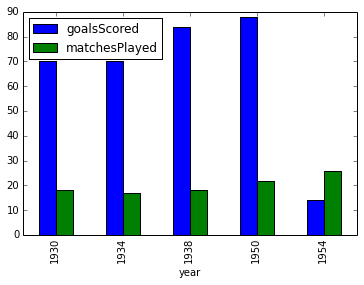

In [23]:
#bar chart shows 2 columns-goalScored and matchesPlayed
df.plot.bar(y=['goalsScored','matchesPlayed'], x='year')

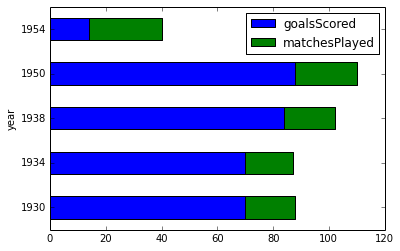

In [24]:
#Using barh method for horizontal view
#lets plot stacked bar plot using stacked=True
z=df.plot.barh(y=['goalsScored','matchesPlayed'], x='year',stacked=True)

# 10. Category: Plotting: Box Plots

### Boxplot can be drawn to visualize the distribution of values within each column.

In [25]:
#Lets print df
df

,WorldCup,year,location,first,second,third,fourth,goalsScored,matchesPlayed,attendance
0,wc1930,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,18,590549
1,wc1934,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,17,363000
2,wc1938,1938,France,Italy,Hungary,Brazil,Sweden,84,18,375000
3,wc1950,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,22,1045246
4,wc1954,1954,Switzerland,GermanyFR,Hungary,Austria,Uruguay,14,26,768607


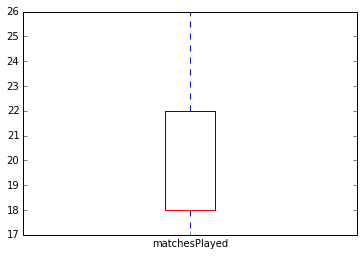

In [26]:
df.plot.box(y='matchesPlayed')
#Blox plot below shows the min matches played is 17, max is 26 and avg as 20